In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Set style for better-looking plots
plt.style.use('seaborn')
sns.set_palette("husl")

# Read the datasets
orders = pd.read_csv('../data/olist_orders_dataset.csv')
customers = pd.read_csv('../data/olist_customers_dataset.csv')
products = pd.read_csv('../data/olist_products_dataset.csv')

# Display first few rows of each dataset
print("Orders shape:", orders.shape)
print("\nFirst few rows of orders:")
display(orders.head())

print("\nCustomers shape:", customers.shape)
print("\nFirst few rows of customers:")
display(customers.head())

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Read the datasets
try:
    orders = pd.read_csv('../data/olist_orders_dataset.csv')
    customers = pd.read_csv('../data/olist_customers_dataset.csv')
    products = pd.read_csv('../data/olist_products_dataset.csv')
    
    # Display information about our datasets
    print("Orders shape:", orders.shape)
    print("\nFirst few rows of orders:")
    display(orders.head())
    
    print("\nCustomers shape:", customers.shape)
    print("\nFirst few rows of customers:")
    display(customers.head())
    
except FileNotFoundError:
    print("Could not find data files. Please check if they are in the correct location:")
    print("Should be in: ~/Documents/data-science-confessions/seasonal-patterns/data/")


Orders shape: (99441, 8)

First few rows of orders:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00



Customers shape: (99441, 5)

First few rows of customers:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


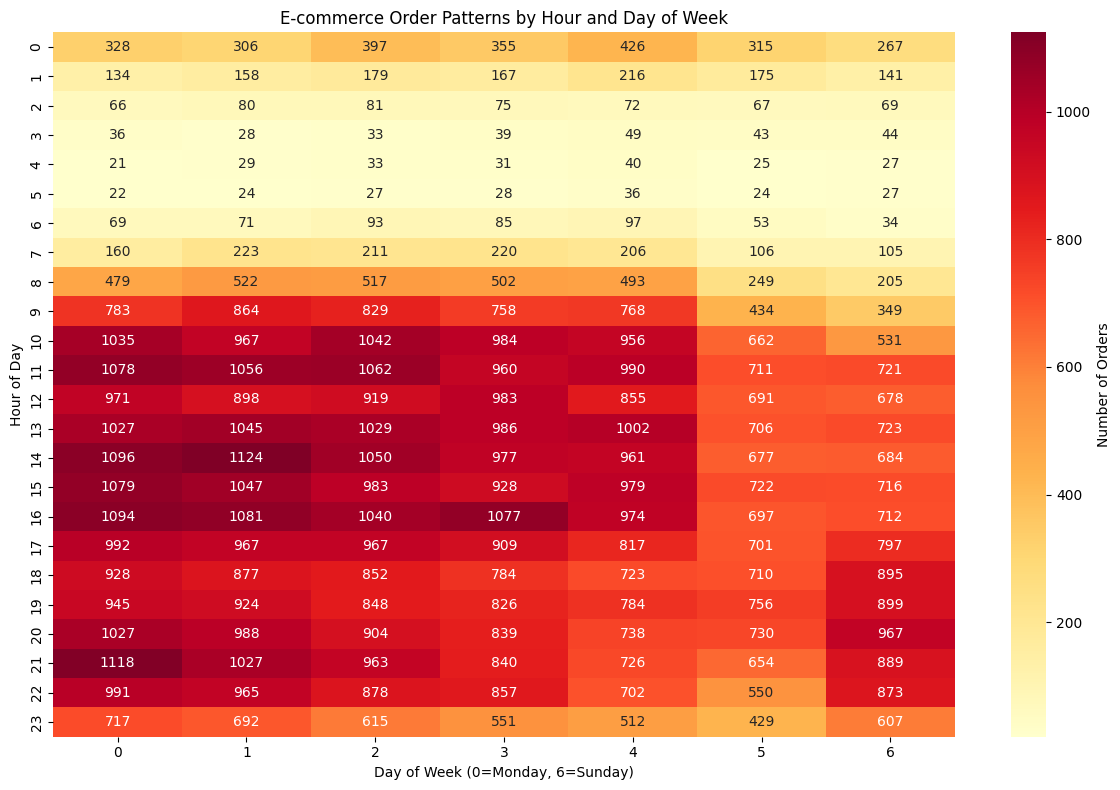

In [3]:
# Process orders data to extract seasonal patterns
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['season'] = orders['order_purchase_timestamp'].dt.quarter
orders['month'] = orders['order_purchase_timestamp'].dt.month
orders['hour'] = orders['order_purchase_timestamp'].dt.hour
orders['day_of_week'] = orders['order_purchase_timestamp'].dt.dayofweek

# Create hour x day of week heatmap
order_counts = pd.crosstab(orders['hour'], orders['day_of_week'])

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(order_counts, 
            cmap='YlOrRd',
            annot=True, 
            fmt='d',
            cbar_kws={'label': 'Number of Orders'})

plt.title('E-commerce Order Patterns by Hour and Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Hour of Day')
plt.tight_layout()

# Save the plot
plt.savefig('../images/order_patterns_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

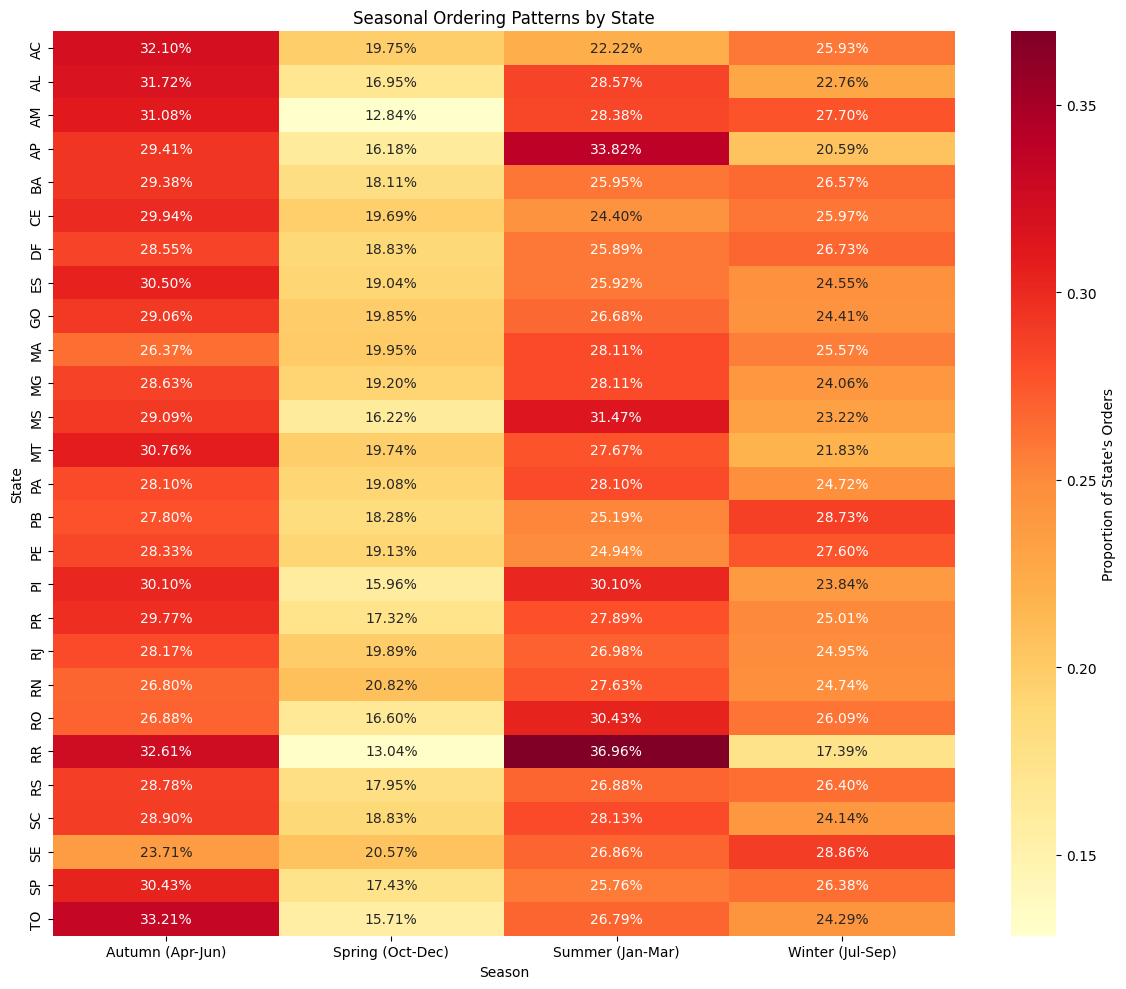

In [4]:
# Merge orders with customers to get state information
orders_customers = orders.merge(customers, on='customer_id')

# Create season mapping for better labels
season_map = {
    1: 'Summer (Jan-Mar)',  # Southern hemisphere seasons
    2: 'Autumn (Apr-Jun)',
    3: 'Winter (Jul-Sep)',
    4: 'Spring (Oct-Dec)'
}

# Process data for state x season heatmap
orders['season_name'] = orders['season'].map(season_map)
seasonal_state = pd.crosstab(orders_customers['customer_state'], orders['season_name'])

# Normalize by state
seasonal_state_normalized = seasonal_state.div(seasonal_state.sum(axis=1), axis=0)

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(seasonal_state_normalized,
            cmap='YlOrRd',
            annot=True,
            fmt='.2%',
            cbar_kws={'label': 'Proportion of State\'s Orders'})

plt.title('Seasonal Ordering Patterns by State')
plt.xlabel('Season')
plt.ylabel('State')
plt.tight_layout()

# Save the plot
plt.savefig('../images/seasonal_state_patterns.png', dpi=300, bbox_inches='tight')
plt.show()